In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/여친_TravelMate

/content/drive/MyDrive/Colab Notebooks/여친_TravelMate


In [4]:
pwd

'/content/drive/MyDrive/Colab Notebooks/여친_TravelMate'

# 0. 라이브러리 호출 및 데이터 로드

In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Classifier 성능 분석 라이브러리
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Regressor 성능 분석 라이브러리
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import seaborn as sns

In [6]:
raw = pd.read_csv('./원본 데이터/Merge/All_Inclusive_Data_1.csv')
raw

<ipython-input-6-6b3b9e190a57>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv('./원본 데이터/Merge/All_Inclusive_Data_1.csv')


,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR_x,LOTNO_ADDR_x,X_COORD,Y_COORD,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,2210300004,b_b010312,9,니지텐,2022-10-30,2022-10-30,경남 통영시 봉수로 60,경남 통영시 봉평동 192-12,128.415586,34.826126,...,6,6,대구광역시,경남,나홀로 여행,2022-10-29~2022-10-30,1,4.0,2.0,0
1,2210290002,b_b010312,6,훌훌게스트하우스,2022-10-29,2022-10-30,경남 통영시 진남2길 28,경남 통영시 미수동 953-2,128.408225,34.832895,...,6,6,대구광역시,경남,나홀로 여행,2022-10-29~2022-10-30,1,4.0,2.0,0
2,2210290001,b_b010312,1,집,2022-10-29,2022-10-29,NaN,NaN,NaN,NaN,...,6,6,대구광역시,경남,나홀로 여행,2022-10-29~2022-10-30,1,4.0,2.0,0
3,2210300005,b_b010312,10,봄날의책방,2022-10-30,2022-10-30,경남 통영시 봉수1길 6-1,경남 통영시 봉평동 188-23,128.415414,34.826333,...,6,6,대구광역시,경남,나홀로 여행,2022-10-29~2022-10-30,1,4.0,2.0,0
4,2210300002,b_b010312,8,통영케이블카,2022-10-30,2022-10-30,경남 통영시 발개로 205,경남 통영시 도남동 349-1,128.426208,34.826788,...,6,6,대구광역시,경남,나홀로 여행,2022-10-29~2022-10-30,1,4.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60639,2208230010,d_d000621,28,에코티엘,2022-08-23,2022-08-24,제주특별자치도 제주시 신광로4길 24,제주특별자치도 제주시 연동 251-69,126.487583,33.489267,...,3,5,경기도,제주,2인 가족 여행,2022-08-21~2022-08-24,1,2.0,7.0,1
60640,2208220008,d_d000621,15,성산포항종합여객터미널,2022-08-22,2022-08-22,제주특별자치도 서귀포시 성산읍 성산등용로 112-7,제주특별자치도 서귀포시 성산읍,126.934605,33.472891,...,3,5,경기도,제주,2인 가족 여행,2022-08-21~2022-08-24,1,2.0,7.0,1
60641,2208230009,d_d000621,27,앤유 피시방,2022-08-23,2022-08-23,NaN,제주특별자치도 제주시 연동,NaN,NaN,...,3,5,경기도,제주,2인 가족 여행,2022-08-21~2022-08-24,1,2.0,7.0,1
60642,2208230007,d_d000621,25,전주아줌마두루치기,2022-08-23,2022-08-23,제주특별자치도 제주시 신광로4길 25,제주특별자치도 제주시 연동 251-59,126.487416,33.488756,...,3,5,경기도,제주,2인 가족 여행,2022-08-21~2022-08-24,1,2.0,7.0,1


In [7]:
# raw.info()

In [8]:
# raw.columns

In [9]:
# raw.shape

In [10]:
# raw

In [11]:
# raw['ROAD_NM_ADDR_x']

In [12]:
# raw['ROAD_NM_ADDR_y'][0]

### 제주도 데이터프레임 생성

In [13]:
# check_X = raw['ROAD_NM_ADDR_x'].isnull().tolist()
# check_X[2] == 0

In [14]:
# pd.isna(raw['ROAD_NM_ADDR_y'][0])

In [15]:
# key = '제주'

# # 각 값을 문자열로 변환하고, NaN 값을 빈 문자열로 대체
# raw['ROAD_NM_ADDR_x'] = raw['ROAD_NM_ADDR_x'].fillna('').astype(str)
# raw['ROAD_NM_ADDR_y'] = raw['ROAD_NM_ADDR_y'].fillna('').astype(str)

# # '제주'가 포함된 행만 필터링
# filtered_raw = raw[(raw['ROAD_NM_ADDR_x'].str.contains(key)) | (raw['ROAD_NM_ADDR_y'].str.contains(key))]

# filtered_raw.reset_index(drop=True, inplace=True)

# filtered_raw

In [16]:
# # 제주도 데이터 저장
# path = './원본 데이터/Merge/Jeju_1.csv'
# filtered_raw.to_csv(path, index = False)

In [17]:
# raw['TRAVEL_STATUS_DESTINATION']

In [18]:
# filtered = raw
# for i in range(len(raw)):
#   if key not in raw['TRAVEL_STATUS_DESTINATION'][i]:
#     filtered.drop([i], axis = 0, inplace = True)


In [19]:
# filtered_raw = df

## 원본 데이터 로드

In [20]:
# df = pd.read_csv("./원본 데이터/Merge/Jeju.csv")
# df

# 1. 데이터 전처리

## 0. handle 데이터 선정

In [21]:
# handle = [
#     'VISIT_AREA_ID', # 방문지 ID
#     'TRAVEL_ID', # 여행 ID
#     'TRAVELER_ID', # 여행객 ID
#     'VISIT_AREA_NM', # 방문지명
#     'TRAVEL_NM', # 여행명
#     'VISIT_AREA_TYPE_CD', # 방문지 유형 코드
#     'DGSTFN', # 만족도
#     'REVISIT_INTENTION', # 재방문의향
#     'RCMDTN_INTENTION', # 추천 의향
#     'RES_CAFE', # 카페 여부
#     'TRAVEL_PURPOSE', # 여행 목적
#     'TRAVEL_MISSION_PRIORITY', # 개별 미션 최우선순위
#     'GENDER', # 성별
#     'AGE_GRP', # 나이대
#     'INCOME', # 소득 _ 상관계수 확인해보기
#     'TRAVEL_STYL_1', # 여행 스타일
#     'TRAVEL_STYL_2',
#     'TRAVEL_STYL_3',
#     'TRAVEL_STYL_4',
#     'TRAVEL_STYL_5',
#     'TRAVEL_STYL_6',
#     'TRAVEL_STYL_7',
#     'TRAVEL_STYL_8',
#     'TRAVEL_MOTIVE_1', # 여행 동기
#     'TRAVEL_STATUS_ACCOMPANY', # 여행 동반 현황
#     'TRAVEL_COMPANIONS_NUM' # 여행 동반자 수
#     ]

In [22]:
# df = df[handle]
# df

## 1. 방문지 유형 코드(VISIT_AREA_TYPE_CD)


In [23]:
# drop_idx = [9, 12, 21, 22, 23]

In [24]:
# df["VISIT_AREA_TYPE_CD"]

In [25]:
# df["VISIT_AREA_TYPE_CD"][38046] in drop_idx

In [26]:
# for i in range(len(df)):
#   if df["VISIT_AREA_TYPE_CD"][i] in drop_idx:
#     df.drop([i], axis = 0, inplace = True)

# df

In [27]:
# df.reset_index(drop = True, inplace = True)
# df

In [28]:
# # 방문지 유형이 이상한 행 삭제된 데이터 저장
# path = './Data/data_v0.csv'
# df.to_csv(path, index = False)

In [29]:
# df = pd.read_csv("./Data/data_v0.csv")
# df

## 2. motive 1 one-hot-encoding

In [30]:
# df = pd.get_dummies(df, columns = ['TRAVEL_MOTIVE_1'])

In [31]:
# df

In [32]:
# # 필요없는 columns drop
# df_test = df
# df_test = df_test.drop(['TRAVEL_STYL_7',
#                         'TRAVEL_MOTIVE_1_1',
#                         'TRAVEL_MOTIVE_1_2',
#                         'TRAVEL_MOTIVE_1_5',
#                         'TRAVEL_MOTIVE_1_7',
#                         'TRAVEL_MOTIVE_1_10'], axis = 1)
# df_test

In [33]:
# df = df_test
# df

In [34]:
# df.info()

## 4. Gender 변환

In [35]:
# df['GENDER']

In [36]:
# gen_dict = {'남':1, '여':0}
# df['GENDER'] = df['GENDER'].map(gen_dict)
# df['GENDER']

In [37]:
# df.info()

## 5. 여행 동반 현황

In [38]:
# acc = df['TRAVEL_STATUS_ACCOMPANY'].drop_duplicates().tolist()
# acc

In [39]:
# acc_dict = {
#     '자녀 동반 여행': 0,
#     '3인 이상 여행(가족 외)':1,
#     '나홀로 여행':2,
#     '2인 여행(가족 외)':3,
#     '3대 동반 여행(친척 포함)':4,
#     '부모 동반 여행':5,
#     '2인 가족 여행':6
# }

In [40]:
# df["TRAVEL_STATUS_ACCOMPANY"] = df["TRAVEL_STATUS_ACCOMPANY"].map(acc_dict)
# df["TRAVEL_STATUS_ACCOMPANY"]

In [41]:
# df.info()

## 6. 카페 여부

In [42]:
# df['RES_CAFE'] = df['RES_CAFE'].fillna(2)

In [43]:
# df.info()

In [44]:
# df['RES_CAFE'] = df['RES_CAFE'].astype(int)
# df.info()

## 7. 만족도 결측치 삭제

In [45]:
# df = df.dropna(axis = 0)

In [46]:
# df.reset_index(drop = True, inplace = True)

In [47]:
# df

# 2. 데이터 저장 및 로드

In [48]:
# # 전처리 최종 데이터 저장
# path = './Data/data_v4.csv'
# df.to_csv(path, index = False)

In [49]:
# df = pd.read_csv("./Data/data_v4.csv")
# df.info()

## EDA

In [5]:
df = pd.read_csv('./Data/data_v5.csv')
df

,VISIT_AREA_ID,TRAVEL_ID,TRAVELER_ID,VISIT_AREA_NM,TRAVEL_NM,VISIT_AREA_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,RES_CAFE,...,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_STATUS_ACCOMPANY,TRAVEL_COMPANIONS_NUM,SAT
0,2208190004,d_d000296,d000296,산굼부리,D01,1,5.0,5.0,5.0,2,...,3,2,5,4,2,5,3,자녀 동반 여행,3,2
1,2208180010,d_d000296,d000296,한림리조트,D01,24,5.0,5.0,5.0,2,...,3,2,5,4,2,5,3,자녀 동반 여행,3,2
2,2208200001,d_d000296,d000296,스누피가든,D01,6,5.0,5.0,5.0,2,...,3,2,5,4,2,5,3,자녀 동반 여행,3,2
3,2208180007,d_d000296,d000296,협재해수욕장,D01,1,5.0,5.0,5.0,2,...,3,2,5,4,2,5,3,자녀 동반 여행,3,2
4,2208180004,d_d000296,d000296,카페노티드 제주애월,D01,11,1.0,5.0,5.0,1,...,3,2,5,4,2,5,3,자녀 동반 여행,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31772,2208210008,d_d000621,d000621,장동민의크라우드pc방,D01,3,5.0,5.0,5.0,2,...,2,2,4,2,3,5,1,2인 가족 여행,1,2
31773,2208210008,d_d000621,d000621,장동민의크라우드pc방,D01,3,5.0,5.0,5.0,0,...,2,2,4,2,3,5,1,2인 가족 여행,1,2
31774,2208230010,d_d000621,d000621,에코티엘,D01,24,5.0,5.0,5.0,2,...,2,2,4,2,3,5,1,2인 가족 여행,1,2
31775,2208230007,d_d000621,d000621,전주아줌마두루치기,D01,11,5.0,5.0,5.0,0,...,2,2,4,2,3,5,1,2인 가족 여행,1,2


In [51]:
df.isnull().sum()

VISIT_AREA_ID              0
TRAVEL_ID                  0
TRAVELER_ID                0
VISIT_AREA_NM              0
TRAVEL_NM                  0
VISIT_AREA_TYPE_CD         0
DGSTFN                     0
REVISIT_INTENTION          0
RCMDTN_INTENTION           0
RES_CAFE                   0
TRAVEL_PURPOSE             0
TRAVEL_MISSION_PRIORITY    0
GENDER                     0
AGE_GRP                    0
INCOME                     0
TRAVEL_STYL_1              0
TRAVEL_STYL_2              0
TRAVEL_STYL_3              0
TRAVEL_STYL_4              0
TRAVEL_STYL_5              0
TRAVEL_STYL_6              0
TRAVEL_STYL_7              0
TRAVEL_STYL_8              0
TRAVEL_MOTIVE_1            0
TRAVEL_STATUS_ACCOMPANY    0
TRAVEL_COMPANIONS_NUM      0
SAT                        0
dtype: int64

In [52]:
df[df['VISIT_AREA_NM'] == '산굼부리']

,VISIT_AREA_ID,TRAVEL_ID,TRAVELER_ID,VISIT_AREA_NM,TRAVEL_NM,VISIT_AREA_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,RES_CAFE,...,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_STATUS_ACCOMPANY,TRAVEL_COMPANIONS_NUM,SAT
0,2208190004,d_d000296,d000296,산굼부리,D01,1,5.0,5.0,5.0,2,...,3,2,5,4,2,5,3,자녀 동반 여행,3,2
75,2210170005,d_d003259,d003259,산굼부리,D01,1,5.0,5.0,5.0,0,...,2,1,2,2,2,5,2,2인 여행(가족 외),1,2
76,2210170005,d_d003259,d003259,산굼부리,D01,1,5.0,5.0,5.0,2,...,2,1,2,2,2,5,2,2인 여행(가족 외),1,2
205,2209280002,d_d001522,d001522,산굼부리,D01,1,5.0,5.0,5.0,2,...,6,2,6,6,2,3,2,3대 동반 여행(친척 포함),5,2
605,2211010002,d_d010245,d010245,산굼부리,D01,1,5.0,5.0,5.0,2,...,2,1,4,4,5,7,1,2인 가족 여행,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27510,2211110003,d_d012393,d012393,산굼부리,D01,1,5.0,5.0,5.0,2,...,4,3,1,1,4,7,2,나홀로 여행,0,2
27778,2211030003,d_d010363,d010363,산굼부리,D01,1,3.0,3.0,3.0,2,...,3,2,4,4,3,6,2,2인 여행(가족 외),1,1
27926,2210160006,d_d002847,d002847,산굼부리,D01,1,5.0,5.0,5.0,2,...,1,4,6,6,3,6,2,2인 여행(가족 외),1,2
28256,2210090004,d_d002198,d002198,산굼부리,D01,1,4.0,4.0,4.0,2,...,2,3,6,6,5,2,6,2인 여행(가족 외),1,1


In [53]:
# counts = df['DGSTFN'].value_counts()
# counts

In [54]:
# df

In [55]:
# # 새로운 카테고리 컬럼 생성 함수 정의
# def categorize_sat(satisfaction):
#     if satisfaction in [1, 2]:
#         return 0
#     elif satisfaction in [3, 4]:
#         return 1
#     elif satisfaction == 5:
#         return 2

In [56]:
# df['SAT'] = df['DGSTFN'].apply(categorize_sat)

In [57]:
# df['SAT']

In [58]:
# df['SAT'].value_counts().sort_index()

### companion counts

In [59]:
# com_counts = df['TRAVEL_COMPANIONS_NUM'].value_counts().sort_index()
# com_counts

In [60]:
# plt.figure(figsize=(10, 6))
# plt.bar(com_counts.index, com_counts.values, color='skyblue')
# plt.title('Number of Travel Companions Distribution')
# plt.xlabel('Number of Companions')
# plt.ylabel('Frequency')
# plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

### companion type

In [61]:
# com_type = df['TRAVEL_STATUS_ACCOMPANY'].value_counts().sort_index()
# com_type

In [62]:
# # 영어 레이블 생성
# labels = {
#     '2인 가족 여행': '2-Person Family Trip',
#     '2인 여행(가족 외)': '2-Person Non-Family Trip',
#     '3대 동반 여행(친척 포함)': '3-Generation Trip (Including Relatives)',
#     '3인 이상 여행(가족 외)': '3+ Person Non-Family Trip',
#     '나홀로 여행': 'Solo Trip',
#     '부모 동반 여행': 'Trip with Parents',
#     '자녀 동반 여행': 'Trip with Children'
# }

# # 새로운 레이블로 인덱스 변경
# com_type.index = [labels.get(x, x) for x in com_type.index]

# # 막대 그래프 그리기
# plt.figure(figsize=(12, 8))
# plt.bar(com_type.index, com_type.values, color='skyblue')

# # 레이블 추가
# plt.xlabel('Travel Status Accompany')
# plt.ylabel('Count')
# plt.title('Count of Different Travel Status Accompany Types')
# plt.xticks(rotation=45, ha='right')  # x축 레이블 각도 조정
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # 그래프 표시
# plt.tight_layout()
# plt.show()

### TRAVEL_MISSION_PRIORITY

In [63]:
# priority_check = df['TRAVEL_MISSION_PRIORITY'].value_counts().sort_index()
# priority_check

In [64]:
# plt.figure(figsize=(10, 6))
# plt.bar(priority_check.index, priority_check.values, color='skyblue')
# plt.title('Number of TRAVEL MISSION PRIORITY')
# plt.xlabel('Mission Type')
# plt.ylabel('Frequency')
# plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

# 3. 모델 훈련 및 평가

## ver 1

### 0. feature, label 선정, 분류

In [65]:
# features = [
#     'GENDER', # 성별 - c
#     'AGE_GRP', # 나이 - c
#     'INCOME', # 소득
#     'VISIT_AREA_TYPE_CD', # 방문지 유형 코드 - c
#     'TRAVEL_STATUS_ACCOMPANY', # 동반 현황 - c
#     'TRAVEL_COMPANIONS_NUM', # 동반자수
#     'TRAVEL_MISSION_PRIORITY', # 개별 미션 최우선 순위 - c
#     'TRAVEL_STYL_1', # 자연, 도시
#     'TRAVEL_STYL_2', # 숙박, 당일
#     'TRAVEL_STYL_3', # 새로운 지역, 익숙한 지역
#     'TRAVEL_STYL_5', # 휴양/휴식, 체험활동
#     'TRAVEL_STYL_6', # 유명지
#     'TRAVEL_STYL_8', # 계획, 상황 에 따른 여행
#     'RES_CAFE', # 카페 여부 - c
#     'TRAVEL_MOTIVE_1_3', # 동반자 유대감 증진
#     'TRAVEL_MOTIVE_1_4', # 자아 찾기
#     'TRAVEL_MOTIVE_1_6', # 운동, 건강
#     'TRAVEL_MOTIVE_1_8', # 역사, 문화 탐방
#     'TRAVEL_MOTIVE_1_9' # 특별한 목적(칠순, 신혼, 수학여행)
#     ]
# label = ['DGSTFN']

In [66]:
# X = df[features]
# y = df[label]

In [67]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10 )

In [68]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [69]:
# cat_features = [
#     'GENDER', # 성별 - c
#     'AGE_GRP', # 나이 - c
#     'VISIT_AREA_TYPE_CD', # 방문지 유형 코드 - c
#     'TRAVEL_STATUS_ACCOMPANY', # 동반 현황 - c
#     'TRAVEL_COMPANIONS_NUM', # 동반자수
#     'TRAVEL_MISSION_PRIORITY', # 개별 미션 최우선 순위 - c
#     'TRAVEL_STYL_1', # 자연, 도시
#     'TRAVEL_STYL_2', # 숙박, 당일
#     'TRAVEL_STYL_3', # 새로운 지역, 익숙한 지역
#     'TRAVEL_STYL_5', # 휴양/휴식, 체험활동
#     'TRAVEL_STYL_6', # 유명지
#     'TRAVEL_STYL_8', # 계획, 상황 에 따른 여행
#     'RES_CAFE', # 카페 여부 - c
#     'TRAVEL_MOTIVE_1_3', # 동반자 유대감 증진
#     'TRAVEL_MOTIVE_1_4', # 자아 찾기
#     'TRAVEL_MOTIVE_1_6', # 운동, 건강
#     'TRAVEL_MOTIVE_1_8', # 역사, 문화 탐방
#     'TRAVEL_MOTIVE_1_9' # 특별한 목적(칠순, 신혼, 수학여행)
#     ]

In [70]:
# class_weights = {1.0: 10, 2.0: 5, 3.0: 1, 4.0: 1, 5.0: 1}

### 3. 모델 훈련 및 평가

In [71]:
# random_state = 10

# # y_train, y_test에 대해 LabelEncoder 사용
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # RandomForest 모델 정의 및 학습
# rf_model = RandomForestRegressor(n_estimators = 1000, random_state = random_state)
# rf_model.fit(X_train, y_train_encoded)

# # XGBoost 모델 정의 및 학습
# xgb_model = xgb.XGBRegressor(n_estimators = 1000, random_state = random_state)
# xgb_model.fit(X_train, y_train_encoded)

# # LightGBM 모델 정의 및 학습
# lgb_model = lgb.LGBMRegressor(n_estimators = 1000, random_state = random_state)
# lgb_model.fit(X_train, y_train_encoded)

# # CatBoost 모델 정의 및 학습
# cat_model = CatBoostRegressor(iterations = 1000, cat_features = cat_features, random_state = random_state, verbose = 0)
# cat_model.fit(X_train, y_train_encoded)

# # 각 모델로 예측
# y_rf_pred = rf_model.predict(X_test)
# y_xgb_pred = xgb_model.predict(X_test)
# y_lgb_pred = lgb_model.predict(X_test)
# y_cat_pred = cat_model.predict(X_test)

# # 성능 평가 함수 정의
# def evaluate_model(y_true, y_pred):
#     mse = mean_squared_error(y_true, y_pred)
#     mae = mean_absolute_error(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)
#     return mse, mae, r2

# # 각 모델에 대해 성능 평가 수행
# rf_mse, rf_mae, rf_r2 = evaluate_model(y_test_encoded, y_rf_pred)
# xgb_mse, xgb_mae, xgb_r2 = evaluate_model(y_test_encoded, y_xgb_pred)
# lgb_mse, lgb_mae, lgb_r2 = evaluate_model(y_test_encoded, y_lgb_pred)
# cat_mse, cat_mae, cat_r2 = evaluate_model(y_test_encoded, y_cat_pred)

# # 성능 평가 결과 출력
# print(f"RandomForest - MSE: {rf_mse}, MAE: {rf_mae}, R²: {rf_r2}")
# print(f"XGBoost - MSE: {xgb_mse}, MAE: {xgb_mae}, R²: {xgb_r2}")
# print(f"LightGBM - MSE: {lgb_mse}, MAE: {lgb_mae}, R²: {lgb_r2}")
# print(f"CatBoost - MSE: {cat_mse}, MAE: {cat_mae}, R²: {cat_r2}")

In [72]:
# def get_feature_importance(model, feature_names):
#     importance = model.feature_importances_
#     feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
#     return feature_importance.sort_values(by='Importance', ascending=False)

# # Get feature importance
# cat_fi = get_feature_importance(cat_model, X_train.columns)

# # Print feature importance
# print(cat_fi)

In [73]:
# result = y_test
# result['RF'] = y_rf_pred
# result['XGB'] = y_xgb_pred
# result['LGB'] = y_lgb_pred
# result['CAT'] = y_cat_pred
# result

## ver 2

### feature, label 선정, 분류

In [6]:
features_1 = [
    # 'GENDER', # 성별 - c
    # 'AGE_GRP', # 나이 - c
    # 'INCOME', # 소득
    'VISIT_AREA_TYPE_CD', # 방문지 유형 코드 - c
    # 'TRAVEL_COMPANIONS_NUM', # 동반자수
    'TRAVEL_STATUS_ACCOMPANY', # 동반자 유형
    'TRAVEL_MISSION_PRIORITY', # 개별 미션 최우선 순위 - c
    'TRAVEL_STYL_1', # 자연, 도시
    # 'TRAVEL_STYL_2', # 숙박, 당일
    # 'TRAVEL_STYL_3', # 새로운 지역, 익숙한 지역
    'TRAVEL_STYL_5', # 휴양/휴식, 체험활동
    'TRAVEL_STYL_6', # 유명지
    # 'TRAVEL_STYL_8', # 계획, 상황 에 따른 여행
    # 'RES_CAFE', # 카페 여부 - c
    # 'TRAVEL_MOTIVE_1', # 여행 동기
    # 'VISIT_AREA_NM' # 방문지 이름 - c
    ]

label = ['SAT']

cat_features_1 = [
    # 'GENDER', # 성별 - c
    # 'AGE_GRP', # 나이 - c
    # 'INCOME', # 소득
    'VISIT_AREA_TYPE_CD', # 방문지 유형 코드 - c
    # 'TRAVEL_COMPANIONS_NUM', # 동반자수
    'TRAVEL_STATUS_ACCOMPANY', # 동반자 유형
    'TRAVEL_MISSION_PRIORITY', # 개별 미션 최우선 순위 - c
    # 'TRAVEL_STYL_1', # 자연, 도시
    # 'TRAVEL_STYL_2', # 숙박, 당일
    # 'TRAVEL_STYL_3', # 새로운 지역, 익숙한 지역
    # 'TRAVEL_STYL_5', # 휴양/휴식, 체험활동
    # 'TRAVEL_STYL_6', # 유명지
    # 'TRAVEL_STYL_8', # 계획, 상황 에 따른 여행
    # 'RES_CAFE', # 카페 여부 - c
    # 'TRAVEL_MOTIVE_1', # 여행 동기
    # 'VISIT_AREA_NM' # 방문지 이름 - c
    ]

In [7]:
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 10)
print(train_data.shape, test_data.shape)

(25421, 27) (6356, 27)


In [8]:
train_pool = Pool(train_data[features_1],
                  label = train_data[label],
                  cat_features = cat_features_1)

test_pool = Pool(test_data[features_1],
                  label = test_data[label],
                  cat_features = cat_features_1)


### 모델 정의 및 학습

In [9]:
random_state = 10

cat_model = CatBoostRegressor(
    loss_function = 'RMSE',
    eval_metric = "MAE",
    task_type = 'GPU',
    depth = 6,
    learning_rate = 0.01,
    n_estimators = 2000,
    random_state = random_state
)

cat_model.fit(
    train_pool,
    eval_set = test_pool,
    verbose = 500,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 0.5292968	test: 0.5315638	best: 0.5315638 (0)	total: 43.7ms	remaining: 1m 27s
500:	learn: 0.5105268	test: 0.5144471	best: 0.5144471 (500)	total: 14.1s	remaining: 42.2s
1000:	learn: 0.5050288	test: 0.5103607	best: 0.5103607 (1000)	total: 28s	remaining: 28s
1500:	learn: 0.5017141	test: 0.5081321	best: 0.5081321 (1500)	total: 36.5s	remaining: 12.1s
1999:	learn: 0.4994708	test: 0.5065441	best: 0.5065441 (1999)	total: 48.3s	remaining: 0us
bestTest = 0.5065440519
bestIteration = 1999


### 모델 저장

In [10]:
cat_model.save_model('./Model/catboost_model_type_1.cbm')

### Predict 데이터 시각화 및 통계적 수치

In [11]:
cat_model.predict(train_data[features_1])

array([1.37504767, 1.36527396, 1.4798626 , ..., 1.4105238 , 1.58755594,
       1.45665806])

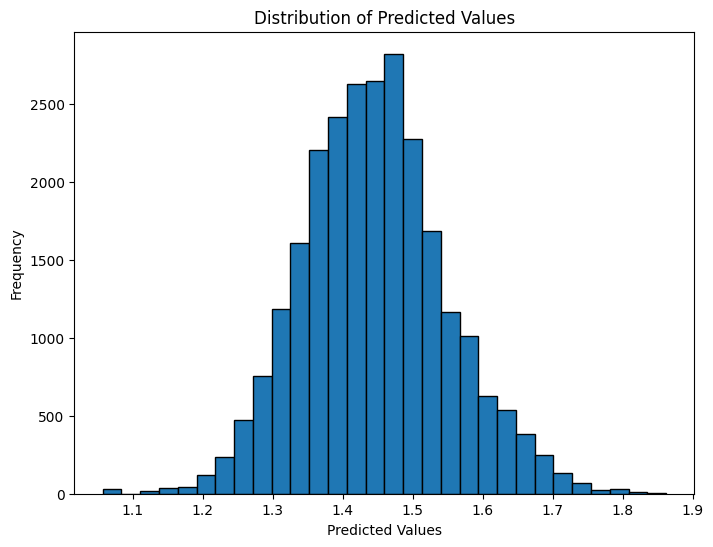

In [12]:
# 예측 결과
predictions = cat_model.predict(train_data[features_1])

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(predictions, bins=30, edgecolor='black')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

In [81]:
# 기초 통계량 계산
mean_prediction = np.mean(predictions)
median_prediction = np.median(predictions)
std_deviation = np.std(predictions)

print(f'Mean Predicted Value: {mean_prediction:.2f}')
print(f'Median Predicted Value: {median_prediction:.2f}')
print(f'Standard Deviation of Predictions: {std_deviation:.2f}')

Mean Predicted Value: 1.45
Median Predicted Value: 1.44
Standard Deviation of Predictions: 0.10


In [82]:
# RMSE

### Predict 예시

In [83]:
test_data.iloc[10]

VISIT_AREA_ID               2210220007
TRAVEL_ID                    d_d004780
TRAVELER_ID                    d004780
VISIT_AREA_NM                     세화해변
TRAVEL_NM                          D01
VISIT_AREA_TYPE_CD                   1
DGSTFN                             5.0
REVISIT_INTENTION                  5.0
RCMDTN_INTENTION                   5.0
RES_CAFE                             2
TRAVEL_PURPOSE              6;22;2;26;
TRAVEL_MISSION_PRIORITY             22
GENDER                               여
AGE_GRP                             20
INCOME                               4
TRAVEL_STYL_1                        4
TRAVEL_STYL_2                        2
TRAVEL_STYL_3                        2
TRAVEL_STYL_4                        5
TRAVEL_STYL_5                        2
TRAVEL_STYL_6                        4
TRAVEL_STYL_7                        6
TRAVEL_STYL_8                        7
TRAVEL_MOTIVE_1                      2
TRAVEL_STATUS_ACCOMPANY    2인 여행(가족 외)
TRAVEL_COMPANIONS_NUM    

In [84]:
test_data[features_1].iloc[10]

VISIT_AREA_TYPE_CD                   1
TRAVEL_STATUS_ACCOMPANY    2인 여행(가족 외)
TRAVEL_MISSION_PRIORITY             22
TRAVEL_STYL_1                        4
TRAVEL_STYL_5                        2
TRAVEL_STYL_6                        4
Name: 23192, dtype: object

In [85]:
test_data[label].iloc[10]

SAT    2
Name: 23192, dtype: int64

In [86]:
n = 51
print(test_data.iloc[n],"\n\n predict:", cat_model.predict(test_data[features_1].iloc[n]))

VISIT_AREA_ID               2209240004
TRAVEL_ID                    d_d001570
TRAVELER_ID                    d001570
VISIT_AREA_NM                   제주동문시장
TRAVEL_NM                          D01
VISIT_AREA_TYPE_CD                   4
DGSTFN                             4.0
REVISIT_INTENTION                  4.0
RCMDTN_INTENTION                   4.0
RES_CAFE                             1
TRAVEL_PURPOSE                 2;24;5;
TRAVEL_MISSION_PRIORITY              5
GENDER                               여
AGE_GRP                             20
INCOME                               3
TRAVEL_STYL_1                        2
TRAVEL_STYL_2                        2
TRAVEL_STYL_3                        2
TRAVEL_STYL_4                        2
TRAVEL_STYL_5                        2
TRAVEL_STYL_6                        2
TRAVEL_STYL_7                        2
TRAVEL_STYL_8                        2
TRAVEL_MOTIVE_1                      2
TRAVEL_STATUS_ACCOMPANY    2인 여행(가족 외)
TRAVEL_COMPANIONS_NUM    

In [87]:
cat_model.get_feature_importance(prettified = True)

,Feature Id,Importances
0,TRAVEL_STYL_1,21.540038
1,TRAVEL_STATUS_ACCOMPANY,18.337001
2,TRAVEL_MISSION_PRIORITY,17.232485
3,TRAVEL_STYL_5,16.559224
4,TRAVEL_STYL_6,15.405301
5,VISIT_AREA_TYPE_CD,10.925952


## ver 3

### feature, label 선정*분류

feature 2는 없습니다 그냥 없는 겁니다

In [88]:
features_3 = [
    # 'GENDER', # 성별 - c
    # 'AGE_GRP', # 나이 - c
    # 'INCOME', # 소득
    # 'VISIT_AREA_TYPE_CD', # 방문지 유형 코드 - c
    # 'TRAVEL_COMPANIONS_NUM', # 동반자수
    'TRAVEL_STATUS_ACCOMPANY', # 동반자 유형
    'TRAVEL_MISSION_PRIORITY', # 개별 미션 최우선 순위 - c
    'TRAVEL_STYL_1', # 자연, 도시
    # 'TRAVEL_STYL_2', # 숙박, 당일
    # 'TRAVEL_STYL_3', # 새로운 지역, 익숙한 지역
    'TRAVEL_STYL_5', # 휴양/휴식, 체험활동
    'TRAVEL_STYL_6', # 유명지
    # 'TRAVEL_STYL_8', # 계획, 상황 에 따른 여행
    # 'RES_CAFE', # 카페 여부 - c
    # 'TRAVEL_MOTIVE_1', # 여행 동기
    'VISIT_AREA_NM' # 방문지 이름 - c
    ]

label_3 = ['SAT']

cat_features_3 = [
    # 'GENDER', # 성별 - c
    # 'AGE_GRP', # 나이 - c
    # 'INCOME', # 소득
    # 'VISIT_AREA_TYPE_CD', # 방문지 유형 코드 - c
    # 'TRAVEL_COMPANIONS_NUM', # 동반자수
    'TRAVEL_STATUS_ACCOMPANY', # 동반자 유형
    'TRAVEL_MISSION_PRIORITY', # 개별 미션 최우선 순위 - c
    # 'TRAVEL_STYL_1', # 자연, 도시
    # 'TRAVEL_STYL_2', # 숙박, 당일
    # 'TRAVEL_STYL_3', # 새로운 지역, 익숙한 지역
    # 'TRAVEL_STYL_5', # 휴양/휴식, 체험활동
    # 'TRAVEL_STYL_6', # 유명지
    # 'TRAVEL_STYL_8', # 계획, 상황 에 따른 여행
    # 'RES_CAFE', # 카페 여부 - c
    # 'TRAVEL_MOTIVE_1', # 여행 동기
    'VISIT_AREA_NM' # 방문지 이름 - c
    ]

### train_test

In [89]:
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 10)
print(train_data.shape, test_data.shape)

(25421, 27) (6356, 27)


In [90]:
train_pool = Pool(train_data[features_3],
                  label = train_data[label_3],
                  cat_features = cat_features_3)

test_pool = Pool(test_data[features_3],
                  label = test_data[label_3],
                  cat_features = cat_features_3)


### 모델 정의 및 학습

In [91]:
random_state = 10

cat_model_3 = CatBoostRegressor(
    loss_function = 'RMSE',
    eval_metric = "MAE",
    task_type = 'GPU',
    depth = 6,
    learning_rate = 0.01,
    n_estimators = 2000,
    random_state = random_state
)

cat_model_3.fit(
    train_pool,
    eval_set = test_pool,
    verbose = 500,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 0.5292628	test: 0.5315295	best: 0.5315295 (0)	total: 35.8ms	remaining: 1m 11s
500:	learn: 0.4954387	test: 0.4905528	best: 0.4905528 (500)	total: 14.3s	remaining: 42.9s
1000:	learn: 0.4881149	test: 0.4833999	best: 0.4833999 (1000)	total: 27s	remaining: 27s
1500:	learn: 0.4844329	test: 0.4802173	best: 0.4802139 (1495)	total: 38.7s	remaining: 12.9s
1999:	learn: 0.4826732	test: 0.4790144	best: 0.4790138 (1995)	total: 47.3s	remaining: 0us
bestTest = 0.4790137779
bestIteration = 1995
Shrink model to first 1996 iterations.


### Predict 데이터 분석

In [92]:
cat_model_3.predict(train_data[features_3])

array([1.68379085, 1.58674234, 1.71513188, ..., 1.69468513, 1.83140851,
       1.2163911 ])

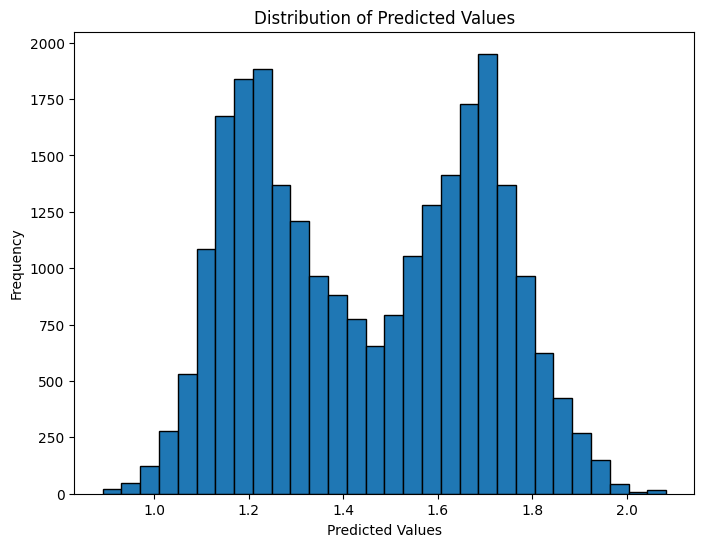

In [93]:
# 예측 결과
predictions_3 = cat_model_3.predict(train_data[features_3])

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(predictions_3, bins=30, edgecolor='black')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

In [94]:
n = 51
print(test_data.iloc[n],"\n\n predict:", cat_model_2.predict(test_data[features_2].iloc[n]))

VISIT_AREA_ID               2209240004
TRAVEL_ID                    d_d001570
TRAVELER_ID                    d001570
VISIT_AREA_NM                   제주동문시장
TRAVEL_NM                          D01
VISIT_AREA_TYPE_CD                   4
DGSTFN                             4.0
REVISIT_INTENTION                  4.0
RCMDTN_INTENTION                   4.0
RES_CAFE                             1
TRAVEL_PURPOSE                 2;24;5;
TRAVEL_MISSION_PRIORITY              5
GENDER                               여
AGE_GRP                             20
INCOME                               3
TRAVEL_STYL_1                        2
TRAVEL_STYL_2                        2
TRAVEL_STYL_3                        2
TRAVEL_STYL_4                        2
TRAVEL_STYL_5                        2
TRAVEL_STYL_6                        2
TRAVEL_STYL_7                        2
TRAVEL_STYL_8                        2
TRAVEL_MOTIVE_1                      2
TRAVEL_STATUS_ACCOMPANY    2인 여행(가족 외)
TRAVEL_COMPANIONS_NUM    

## ver 4

### feature, label 선정*분류

In [96]:
features_4 = [
    # 'GENDER', # 성별 - c
    # 'AGE_GRP', # 나이 - c
    # 'INCOME', # 소득
    'VISIT_AREA_TYPE_CD', # 방문지 유형 코드 - c
    # 'TRAVEL_COMPANIONS_NUM', # 동반자수
    'TRAVEL_STATUS_ACCOMPANY', # 동반자 유형
    'TRAVEL_MISSION_PRIORITY', # 개별 미션 최우선 순위 - c
    'TRAVEL_STYL_1', # 자연, 도시
    # 'TRAVEL_STYL_2', # 숙박, 당일
    # 'TRAVEL_STYL_3', # 새로운 지역, 익숙한 지역
    'TRAVEL_STYL_5', # 휴양/휴식, 체험활동
    'TRAVEL_STYL_6', # 유명지
    # 'TRAVEL_STYL_8', # 계획, 상황 에 따른 여행
    # 'RES_CAFE', # 카페 여부 - c
    # 'TRAVEL_MOTIVE_1', # 여행 동기
    'VISIT_AREA_NM' # 방문지 이름 - c
    ]

label_4 = ['SAT']

cat_features_4 = [
    # 'GENDER', # 성별 - c
    # 'AGE_GRP', # 나이 - c
    # 'INCOME', # 소득
    'VISIT_AREA_TYPE_CD', # 방문지 유형 코드 - c
    # 'TRAVEL_COMPANIONS_NUM', # 동반자수
    'TRAVEL_STATUS_ACCOMPANY', # 동반자 유형
    'TRAVEL_MISSION_PRIORITY', # 개별 미션 최우선 순위 - c
    # 'TRAVEL_STYL_1', # 자연, 도시
    # 'TRAVEL_STYL_2', # 숙박, 당일
    # 'TRAVEL_STYL_3', # 새로운 지역, 익숙한 지역
    # 'TRAVEL_STYL_5', # 휴양/휴식, 체험활동
    # 'TRAVEL_STYL_6', # 유명지
    # 'TRAVEL_STYL_8', # 계획, 상황 에 따른 여행
    # 'RES_CAFE', # 카페 여부 - c
    # 'TRAVEL_MOTIVE_1', # 여행 동기
    'VISIT_AREA_NM' # 방문지 이름 - c
    ]

### Train Test

In [97]:
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 10)
print(train_data.shape, test_data.shape)

(25421, 27) (6356, 27)


In [98]:
train_pool = Pool(train_data[features_4],
                  label = train_data[label_4],
                  cat_features = cat_features_4)

test_pool = Pool(test_data[features_4],
                  label = test_data[label_4],
                  cat_features = cat_features_4)


### 모델 정의 및 학습

In [99]:
random_state = 10

cat_model_4 = CatBoostRegressor(
    loss_function = 'RMSE',
    eval_metric = "MAE",
    task_type = 'GPU',
    depth = 6,
    learning_rate = 0.01,
    n_estimators = 2000,
    random_state = random_state
)

cat_model_4.fit(
    train_pool,
    eval_set = test_pool,
    verbose = 500,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 0.5292642	test: 0.5315346	best: 0.5315346 (0)	total: 113ms	remaining: 3m 46s
500:	learn: 0.4937434	test: 0.4880811	best: 0.4880811 (500)	total: 19s	remaining: 57s
1000:	learn: 0.4854710	test: 0.4795924	best: 0.4795924 (1000)	total: 44.9s	remaining: 44.8s
1500:	learn: 0.4823626	test: 0.4774132	best: 0.4774132 (1500)	total: 57.5s	remaining: 19.1s
1999:	learn: 0.4801701	test: 0.4760207	best: 0.4760203 (1995)	total: 1m 10s	remaining: 0us
bestTest = 0.4760202896
bestIteration = 1995
Shrink model to first 1996 iterations.


### Predict  데이터 분석

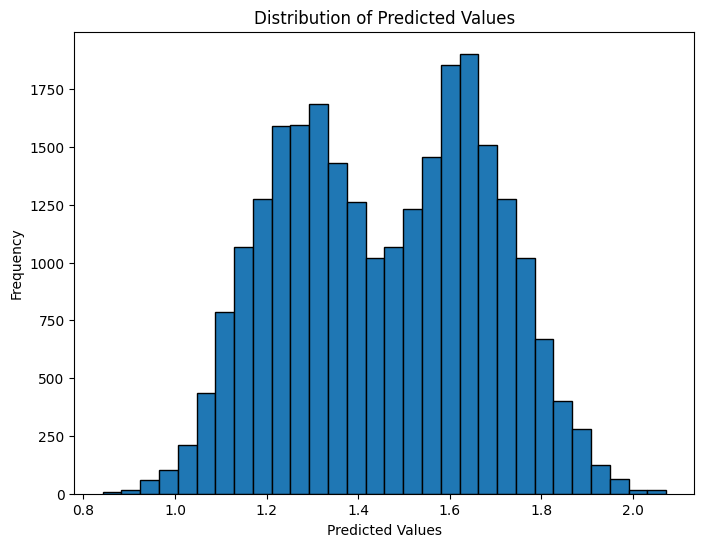

In [107]:
# 예측 결과
predictions_4 = cat_model_4.predict(train_data[features_4])

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(predictions_4, bins=30, edgecolor='black')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

## ver 5

### feature, label 선정*분류

In [101]:
features_5 = [
    # 'GENDER', # 성별 - c
    # 'AGE_GRP', # 나이 - c
    # 'INCOME', # 소득
    'VISIT_AREA_TYPE_CD', # 방문지 유형 코드 - c
    # 'TRAVEL_COMPANIONS_NUM', # 동반자수
    'TRAVEL_STATUS_ACCOMPANY', # 동반자 유형
    'TRAVEL_MISSION_PRIORITY', # 개별 미션 최우선 순위 - c
    'TRAVEL_STYL_1', # 자연, 도시
    # 'TRAVEL_STYL_2', # 숙박, 당일
    # 'TRAVEL_STYL_3', # 새로운 지역, 익숙한 지역
    'TRAVEL_STYL_5', # 휴양/휴식, 체험활동
    'TRAVEL_STYL_6', # 유명지
    # 'TRAVEL_STYL_8', # 계획, 상황 에 따른 여행
    # 'RES_CAFE', # 카페 여부 - c
    # 'TRAVEL_MOTIVE_1', # 여행 동기
    'VISIT_AREA_NM' # 방문지 이름 - c
    ]

label_5 = ['DGSTFN']

cat_features_5 = [
    # 'GENDER', # 성별 - c
    # 'AGE_GRP', # 나이 - c
    # 'INCOME', # 소득
    'VISIT_AREA_TYPE_CD', # 방문지 유형 코드 - c
    # 'TRAVEL_COMPANIONS_NUM', # 동반자수
    'TRAVEL_STATUS_ACCOMPANY', # 동반자 유형
    'TRAVEL_MISSION_PRIORITY', # 개별 미션 최우선 순위 - c
    # 'TRAVEL_STYL_1', # 자연, 도시
    # 'TRAVEL_STYL_2', # 숙박, 당일
    # 'TRAVEL_STYL_3', # 새로운 지역, 익숙한 지역
    # 'TRAVEL_STYL_5', # 휴양/휴식, 체험활동
    # 'TRAVEL_STYL_6', # 유명지
    # 'TRAVEL_STYL_8', # 계획, 상황 에 따른 여행
    # 'RES_CAFE', # 카페 여부 - c
    # 'TRAVEL_MOTIVE_1', # 여행 동기
    'VISIT_AREA_NM' # 방문지 이름 - c
    ]

### Train Test

In [102]:
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 10)
print(train_data.shape, test_data.shape)

(25421, 27) (6356, 27)


In [103]:
train_pool = Pool(train_data[features_5],
                  label = train_data[label_5],
                  cat_features = cat_features_5)

test_pool = Pool(test_data[features_5],
                  label = test_data[label_5],
                  cat_features = cat_features_5)


### 모델 정의 및 학습

In [104]:
random_state = 10

cat_model_5 = CatBoostRegressor(
    loss_function = 'RMSE',
    eval_metric = "MAE",
    task_type = 'GPU',
    depth = 6,
    learning_rate = 0.01,
    n_estimators = 2000,
    random_state = random_state
)

cat_model_5.fit(
    train_pool,
    eval_set = test_pool,
    verbose = 500,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 0.6899690	test: 0.6964732	best: 0.6964732 (0)	total: 129ms	remaining: 4m 17s
500:	learn: 0.6488965	test: 0.6464190	best: 0.6464190 (500)	total: 18.5s	remaining: 55.2s
1000:	learn: 0.6421712	test: 0.6409848	best: 0.6409848 (1000)	total: 36.3s	remaining: 36.3s
1500:	learn: 0.6391238	test: 0.6391904	best: 0.6391904 (1500)	total: 49.6s	remaining: 16.5s
1999:	learn: 0.6373699	test: 0.6384143	best: 0.6384143 (1999)	total: 1m 2s	remaining: 0us
bestTest = 0.6384143289
bestIteration = 1999


### Predict 데이터 분석

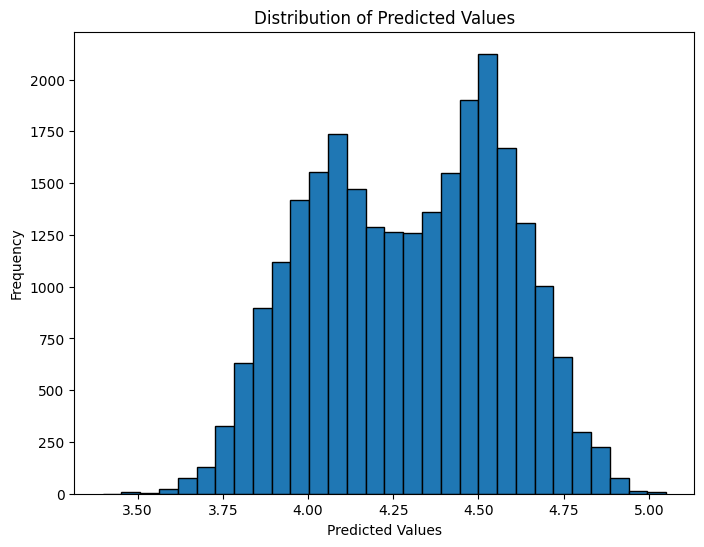

In [106]:
# 예측 결과
predictions_5 = cat_model_5.predict(train_data[features_5])

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(predictions_5, bins=30, edgecolor='black')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()